# <center> Продвинутое использование функций </center>

Спикер: Андрей Рысистов

Контакты(телеграм): @Rysistov

Слак: @Андрей Рысистов(эксперт)


# <center> 0. План занятия:




1. Пространство имен. Область видимости. Разрешение переменных
2. Вложенные функции
3. Операторы global и nonlocal
4. Рекурсивные функции
5. Функции filter(), map()

# <center> 1. Пространство имен. Область видимости. Разрешение переменных

> **Пространства имен** — отличная штука! Будем использовать их чаще! — Тим Петерс в “Дзен Python”.

Вы уже знаете, что для хранения данных в программе используются переменные. Когда вы объявляете новую переменную, вы должны задать ей символическое имя. По нему вы сможете обращаться к переменной в дальнейшем, чтобы получить доступ к объекту.

In [ ]:
students_on_webinar = 19
name_of_course = 'Data Science'
duration = 90

**Пространство имен** — это совокупность определенных в настоящий момент символических имен и информации об объектах, на которые они ссылаются. 

Можно рассматривать такое пространство как словарь, в котором ключи являются именами объектов, а значения — самими объектами. Каждая пара ключ-значение соотносит имя с соответствующим ему объектом.

In [ ]:
print(students_on_webinar)

19


Однако не ко всем именам можно обратиться из любого места программы. Смотрим пример:

In [ ]:
def function(num):
    x = 15
    return x + num

print(function(5)) #вызываем функцию
#print(x) #пытаемся обратиться к переменной x, объявленной в теле функции

20


Но почему-то можно внутри функций обращаться к переменным, объявленным в основном блоке программы:

In [ ]:
def calculate_area_circle(r):
    return 2 * pi * r

pi = 3.14 # объявляем переменную в основном блоке программы
print(calculate_area_circle(r=3)) #вызываем функцию

18.84


К тому же нередко в программе может существовать определение переменных с одним и тем же именем. Иногда эти переменные должны обозначать один объект, а иногда — совершенно разные. Это не ошибка, а вполне распространенная практика.

In [ ]:
def check_len_password(password, n=15):
    if len(password) > n:
        raise ValueError('Превышен лимит символов в пароле')
    else:
        return True

def register_new_user(name, surname, email, password, reg=[]):
    n = len(reg)
    if check_len_password(password):
        reg.append((name, surname, email, password))
        n += 1
    print('Количество пользователей: {}'.format(n))
    return reg

reg = register_new_user(
    'Андрей', 'Рысистов', 'mr.rysistov@skillfactory.ru', '13141125'
    )
reg = register_new_user(
    'Акимов', 'Владислав', 'candarush@mail.ru', 'afjalkag13'
    )
reg = register_new_user(
    'Виктория', 'Лиханова', 'lixanova226@gmail.com', 'lixanova226'
    )
print(reg)

Количество пользователей: 1
Количество пользователей: 2
Количество пользователей: 3
[('Андрей', 'Рысистов', 'mr.rysistov@skillfactory.ru', '13141125'), ('Акимов', 'Владислав', 'candarush@mail.ru', 'afjalkag13'), ('Виктория', 'Лиханова', 'lixanova226@gmail.com', 'lixanova226')]




Отсюда возникает  вопрос: как все это работает? Как интерпретатор понимает, какие имена доступны в конкретный момент исполнения кода и как он понимает, какое именно значение, скрывается за именем переменной?

Ответы на эти вопросы кроются в понятии **области видимости переменных (scope)**. Давайте разберемся, что это такое.

В Python существует четыре типа пространства имен, каждому из которых соответствует своя область видимости.

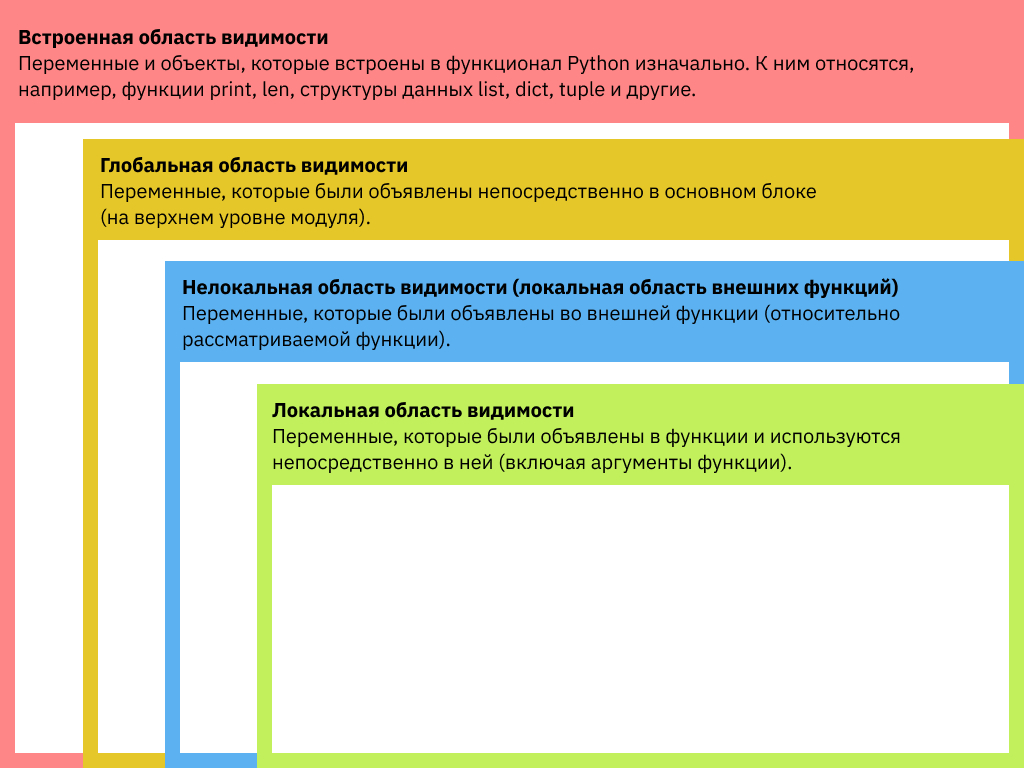

* Встроенные переменные создаются интерпретатором в момент инициализации и доступны для использования в любой программе
* Глобальные переменные - это имена, определенные на уровне самой программы. Они доступы в любой части основной программы
* Нелокальные переменные - это имена, которые объявлены во внешней функции и видны во всех внутренних функциях (об этом чуть ниже)
* Локальные переменные существуют только в момент выполнения функции, они доступны только внутри тела самой функции, по завершении работы функции они удаляются

**Разрешение переменных** — процесс поиска интерпретатором объекта, который скрывается за названием переменной.

Когда интерпретатор встречает в коде неизвестное имя (имя переменной или функции), он начинает искать имя в локальной области видимости, затем — в нелокальной, затем — в глобальной и наконец — во встроенной.

Если интерпретатор не находит имя ни в одной из областей видимости, вызывается ошибка NameError.

> Часто нелокальную область видимости называют объемлющей (enclosed). Поэтому правило, по которому происходит поиск имени объекта среди областей видимости (разрешение), часто именуют правилом **LEGB (Local Enclosed Global Built-in)**.

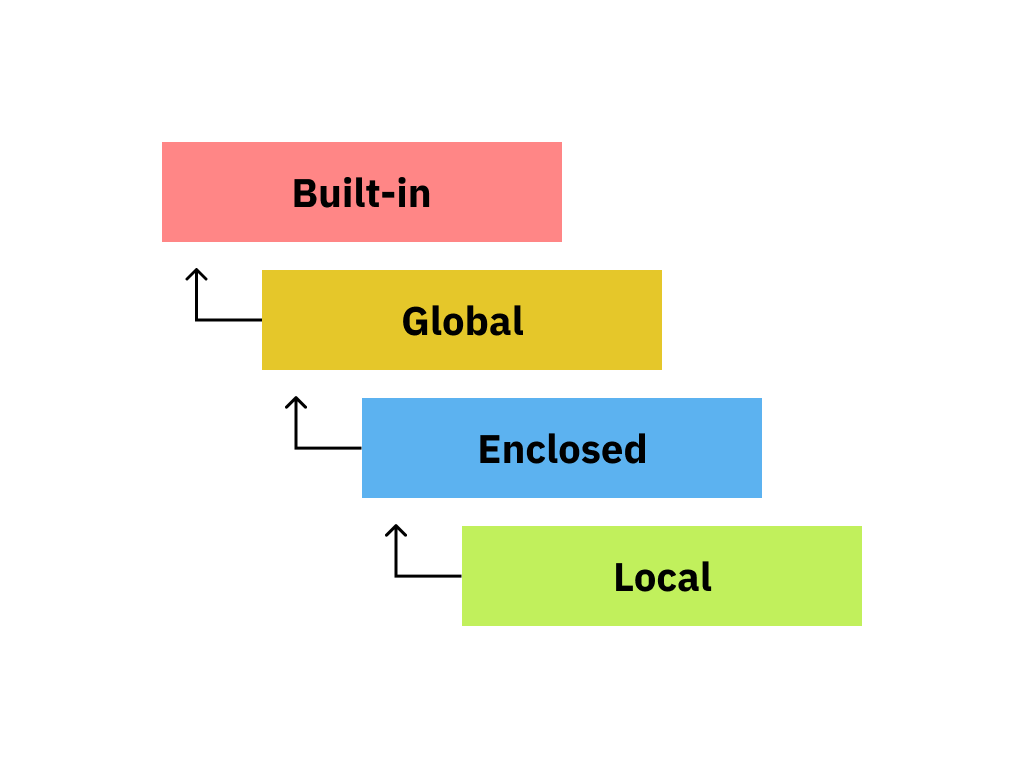

Разберемся, как работает разрешение на следующих примерах:

In [ ]:
def preprocessing_answer(answer):
    # Приводим к нижнему регистру
    answer = answer.lower()
    # Удаляем стоп-символы 
    # Создаём цикл по символам в строке
    for sym in STOP_SYMBOLS:
        # Если стоп-символ есть в строке answer
        if sym in answer:
            # Заменяем стоп-символы в строке на пустые строки
            answer = answer.replace(sym, '')
    # Проверяем, что в строке еще остались символы
    if len(answer) == 0:
        print('Результирующая строка пустая')
    return answer

STOP_SYMBOLS = '"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~!'
preprocessing_answer('Hello, my friends!')


'hello my friends'

Еще пример:

In [ ]:
num_students = 250 # глобальная переменная, видна во всех частях программы

def get_num_webinars(max_participants):
    # max_participants - локальная переменная функции get_num_webinars
    num_webinars = num_students // max_participants # локальная переменная функции get_num_webinars
    if (num_students % max_participants > 0):
        num_webinars += 1
    return num_webinars

webinars = get_num_webinars(max_participants=15) # глобальная переменная

print(webinars) #используем встроенную функцию print
#print(num_webinars) #попытка обратиться к локальной переменной, которой на данный момент не существует

17


**Задачи для слушателей:**

Что будет в результаты выполнения следующего кода?

In [ ]:
count = 10
def function(num):
    count = 100  

function(count)

print(count)

10


In [ ]:
words_list = ['foo', 'bar', 'baz']
def function():
    words_list[1] = 'quux'
    
function()
print(words_list)

['foo', 'quux', 'baz']


In [ ]:
words_list = ['foo', 'bar', 'baz']
def function():
    words_list = ['foo', 'quux', 'baz']

function()
print(words_list)

['foo', 'quux', 'baz']
['foo', 'bar', 'baz']


# <center> 2. Вложенные функции

Функции, которые объявлены в теле других функций, называются **вложенными.**

In [ ]:
def outer_func(name):
    print('Hello, world')
    def inner_func():
        print(f"Hello, {name}")
    inner_func()


outer_func('Andrey')

Hello, world
Hello, Andrey


Обратите внимание на то, что синтаксис при объявлении вложенных функций ничем не отличается от обычных функций. То есть сначала пишется ключевое слово def, далее — имя функции, в круглых скобках указываются параметры функции (если они есть), затем ставится двоеточие и после него на расстоянии четырех пробелов пишется тело функции.

In [ ]:
def inner_func(name):
    print(f"Hello, {name}")

def outer_func(name):
    print('Hello, world')
    inner_func(name)

outer_func('Andrey')

Hello, world
Hello, Andrey


Причины использования вложенных функций:
* инкапсуляция
* вспомогательные функции
* замыкания 
* фабричные функции.

## 2.1. Инкапсуляция

Распространенный вариант использования внутренних функций – когда нужно защитить или скрыть функцию от всего, что происходит за ее пределами, то есть полностью скрыть функцию из глобальной области видимости. Такое поведение обычно называют инкапсуляцией.

In [ ]:
def increment(number):
    def inner_increment():
        return number + 1
    return inner_increment()

print(increment(5)) #Вызываем внешнюю функцию
#print(inner_increment()) #данный код вызовем ошибку NameError

6


## 2.2. Вспомогательные функции

Иногда нам нужна функция, выполняющая один и тот же фрагмент кода в нескольких местах своего тела.

Рассмотрим пример геометрической задачи. 

Одной из основополагающих геометрических фигур, используемых в дизайне является треугольник. Каждый треугольник задается тремя точками, каждая из которых имеет свои координаты x и y на плоскости: $P_1=(x_1, y_1)$, $P_2=(x_2, y_2)$ и $P_3=(x_3, y_3)$.

Предположим, что в нашем приложении есть возможность отрисовки треугольника по введенным пользователем координатам трех его точек. Каждая из трех точек представляет собой кортеж из двух чисел - координата точки по оси x и по оси y соответственно. 

Например, переменные:
```
p1, p2, p3 = (2, 2), (4, 1.25), (1, 4.5)
```
задают следующий треугольник:

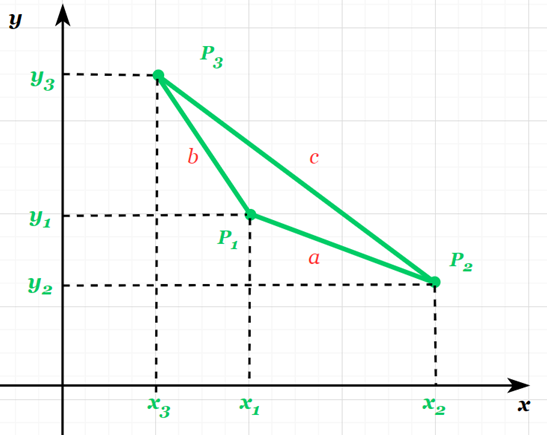


Необходимо реализовать функцию calculate_area_triangle(), которая будет принимать на вход координаты трех точек p1, p2 и p3 и возвращать площадь треугольника.

**Решение**:

Если у треугольника известны длины всех трех сторон, то его площадь можно вычислить по формуле Герона:

$$S=\sqrt{p(p-a)(p-b)(p-c)}$$,
$$P=a+b+c$$

$$p=\frac{P}{2}=\frac{a+b+c}{2}$$

То есть сначала нам необходимо вычислить длины сторон треугольника по координатам его точек. Для этого нам нужно вспомнить школьный курс геометрии. Давайте нарисуем произвольный треугольник $P_1P_2P_3$ в двумерной системе координат:
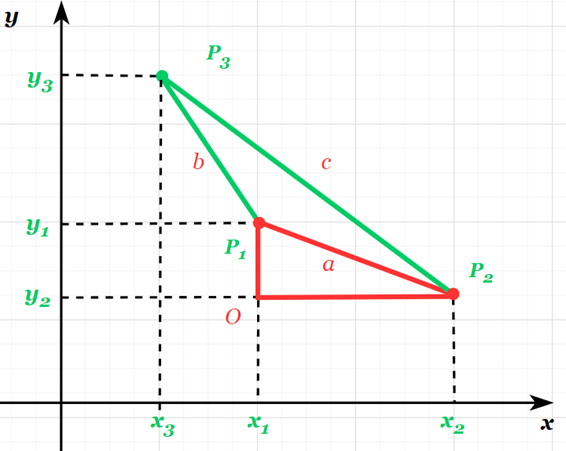

Заметим из рисунка, что длину стороны a можно выразить из треугольника $P_1OP_2$ (отмечен красным цветом) по теореме Пифагора. В этом треугольнике сторона a - гипотенуза. Как известно, квадрат гипотенузы равен сумме квадратов катетов:
$$a^2= (P_1O)^2+(P_2O)^2$$

Чтобы получить саму сторону a, нужно извлечь квадратный корень:
$$a=P_1P_2= \sqrt{(P_1O)^2+(P_2O)^2}$$

В свою очередь длины $P_1O$ и $P_2O$, опять же из рисунка, будут равны:
$$P_1O=y_1-y_2$$
$$P_2O=x_2-x_1$$
Так как при возведении разницы в квадрат не имеет значения что из чего вычитать, то формулу для a можно записать следующим образом (при подставке поменяли $y_2$ и $y_1$ местами):
$$ a=P_1P_2=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$$

Аналогично можно найти и другие стороны b и c:

$$b=P_1P_3=\sqrt{(x_3-x_1)^2+(y_3-y_1)^2}$$
$$c=P_2P_3=\sqrt{(x_3-x_2)^2+(y_3-y_2)^2} $$

In [ ]:
def calculate_distance(x1, y1, x2, y2):
    # Вычисляем расстояние по теореме Пифагора
    distance = ((x2 - x1) ** 2 + (y2 - y1)**2) ** 0.5
    return distance

calculate_distance(2, 2, 4, 1.25)


2.1360009363293826

In [ ]:
def calculate_area_triangle(p1, p2, p3):
    # Распаковываем кортежи
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    # Объявляем внутреннюю функцию для вычисления расстояния между двумя точками
    def calculate_distance(x1, y1, x2, y2):
        # Вычисляем расстояние по теореме Пифагора
        distance = ((x2 - x1) ** 2 + (y2 - y1)**2) ** 0.5
        return distance
    # Объявляем внутренюю функцию для вычисления площади треугольника
    def geron(a, b, c):
        # Вычисляем полупериметр
        p = (a + b + c) / 2
        # Вычисляем площадь по формуле Герона
        area = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        return area
    # Вычисляем длины сторон
    a = calculate_distance(x1, y1, x2, y2)
    b = calculate_distance(x1, y1, x3, y3)
    c = calculate_distance(x2, y2, x3, y3)
    # Вычисляем площадь
    area = geron(a, b, c)
    return area

calculate_area_triangle(p1=(2, 2), p2=(4, 1.25), p3=(1, 4.5))

2.1250000000000027

## 2.3. Объемлющая область видимости

Посмотрим на следующие три примера похожего между собой кода и попробуем определить, что будет выведено в результате каждого примера:

In [ ]:
value = 'global'
def outer():
    def inner():
        print(value)
    inner()

# Вызов функции outer()
outer()

global


In [ ]:
value = 'global'
def outer():
    value = 'enclosing'
    def inner():
        print(value)
    inner()

# Вызов функции outer()
outer()

enclosing


In [ ]:
value = 'global'
def outer():
    value = 'enclosing'
    def inner():
        value = 'local'
        print(value)
    inner()
# Вызов функции outer()
outer()

local


## 2.4. Замыкание

**Замыкание (closure)** — это совокупность вложенной функции, которая использует одну или несколько переменных, объявленных в объемлющей области видимости, и самих этих переменных.
Переменные, которые объявляются в объемлющей области видимости и используются во вложенной функции, называются свободными переменными (free variable)

In [ ]:
#объявляем внешнюю функцию
def outer():
    #создаем локальную переменную
    name = 'Ivan'
    #объявляем внутреннюю функцию
    def inner():
        #выводим значение переменной name
        print('Hello, {}'.format(name))
    #возвращаем функцию inner
    return inner
#вызываем функцию outer
result = outer()
print(result)

<function outer.<locals>.inner at 0x7feef82d0dc0>


In [ ]:
result()

Hello, Ivan


In [ ]:
# Объявляем внешнюю функцию
# Теперь name - параметр функции outer()
def outer(name):
    # Объявляем внутреннюю функцию
    def inner():
        # Выводим значение переменной name
        print('Hello, {}'.format(name))
    # Возвращаем функцию inner
    return inner

# Вызываем функцию outer
result1 = outer(name='Ivan')
result1()

# Вызываем функцию outer еще раз
result2 = outer(name='Katya')
result2()

Hello, Ivan
Hello, Katya


In [ ]:
result1()
result2()
result2()
result1()


Hello, Ivan
Hello, Katya
Hello, Katya
Hello, Ivan


Рассмотрим пример на применение замыкания

При анализе показателей в режиме реального времени, когда у нас непрерывно работает система, например, сайт интернет-магазина, перед нами часто возникает задача расчета статистических характеристик по какому-то параметру. Например, нам в режиме реального времени необходимо подсчитывать и отображать средний чек. 

В такой задаче нам важно, чтобы функция для расчета среднего сохраняла между вызовами предшествующие измерения. Эту задачу можно решить множеством различных способов, в том числе и глобальных переменных, но давайте попробуем воспользоваться только приобретенными знаниями о замыканиях.


In [ ]:
# Объявляем внешнюю функцию
def outer_mean():
    # Создаем свободную переменную sample
    sample = []
    # Объявляем внутреннюю функцию
    def inner_mean(value):
        # Добавляем пришедшее наблюдений в список
        sample.append(value)
        # Считаем среднее по всем наблюдениям
        count = len(sample)
        summa = sum(sample) 
        mean = summa / count
        # Выводим количество наблюдений и среднее на экран
        print('Count transactions: {}, mean check: {:.2f}'.format(count, mean))
    return inner_mean

# Вызываем внешнюю функцию
sample_mean1 = outer_mean()
# Вызываем внутреннюю функцию несколько раз
sample_mean1(15)
sample_mean1(24)
sample_mean1(35)
sample_mean1(27)

Count transactions: 1, mean check: 15.00
Count transactions: 2, mean check: 19.50
Count transactions: 3, mean check: 24.67
Count transactions: 4, mean check: 25.25


In [ ]:
# Еще раз вызываем внешнюю функцию
sample_mean2 = outer_mean()
# Вызываем внутреннюю функцию несколько раз
sample_mean2(135)
sample_mean2(145)
sample_mean2(124)

Count transactions: 1, mean check: 135.00
Count transactions: 2, mean check: 140.00
Count transactions: 3, mean check: 134.67


# <center> 3. Изменение переменных вне области видимости

In [ ]:
count = 10
def function():
    count = 100

print(count)

10


А что, если нам действительно необходимо изменять значение в глобальной области видимости при вызове функции?

Оказывается, если в коде функции происходит переопределение глобальной или нелокальной переменной, то необходимо просто указать, что та или иная переменная является глобальной или нелокальной. Для этого используются ключевые слова global и nonlocal, о которых мы поговорим далее.

## 3.1. Объявление global

Предположим, мы хотим реализовать процесс добавления товара на склад. Под добавлением мы можем понимать что угодно — например, добавление товара в базу данных. Сейчас это непринципиально. Также мы хотим хранить общее количество товаров на складе в виде глобальной переменной с именем global_count.

У нас есть функция add_item() — она реализует добавление товара в базу данных, а после увеличивает общее количество товаров на 1.

In [ ]:
global_count = 0
 
def add_item():
    global_count = global_count + 1
    
#add_item()
print(global_count)

0


Давайте исправим ошибку. Для этого добавим оператор global в функцию перед той переменной, которую хотим изменить глобально. Синтаксис выглядит следующим образом:

`global <имя переменной>`

In [ ]:
global_count = 0
 
def add_item():
    global global_count 
    global_count = global_count + 1
    
add_item()
print(global_count)
    

1


**Важно!** Объявление глобальной переменной в функции с помощью global должно идти раньше, чем эта переменная будет использоваться. 

In [ ]:
global_count = 0
 
def add_item():
    global_count = global_count + 1
    global global_count 
    
add_item()
print(global_count)

**Важно!** Несмотря на то что в Python предусмотрена возможность объявлять и изменять глобальные переменные внутри функций, стандарты разработки на Python крайне не рекомендуют этого делать.

С ростом программы растёт количество переменных, и, если они все будут глобальными и будут изменяться в разных частях кода, может наступить настоящий хаос. Отлаживать такие программы чрезвычайно трудно.

Давайте исправим вот такой код:

In [ ]:
all_students = []

def add_new_students(name, surname):
    global all_students
    all_students += [(name, surname)]

add_new_students('Вася', 'Пупкин')
print(all_students)  

[('Вася', 'Пупкин')]


**Решение:**

In [ ]:
all_students = []

def add_new_students(name, surname, all_students):
    all_students += [(name, surname)]
    return all_students

all_students = add_new_students('Вася', 'Пупкин', all_students)
print(all_students)  

[('Вася', 'Пупкин')]


**Задание для слушателей:**

Чему будет равно значение переменных d1 и d2 в момент выполнения функции?

In [ ]:
c = -2

def outer(a, b):
    global c
    c = 2

    d1 = a + b - c
    d2 = a + b + c

outer(a=5, b=3)

## Объявление nonlocal

На самом деле, аналогичного поведения следует ожидать от вложенных функций и переменных, объявленных в нелокальной (объемлющей) области видимости.

In [ ]:
# Внешняя функция
def outer():
    # Создадим переменную, относящуюся к внешней функции
    enclosing_count = 0
    # Внутренняя функция
    def inner():
        # Прибавим 1 к enclosing_count
        enclosing_count = enclosing_count + 1
    # Напечатаем значение enclosing_count
    print(enclosing_count)
    # Запустим внутреннюю функцию из внешней
    inner()

# Запустим внешнюю функцию
outer()

0


UnboundLocalError: ignored

Чтобы указать интерпретатору, что мы хотим изменить значение именно нелокальной переменной, используется ключевое слово nonlocal. Имена, определённые после этого ключевого слова, ссылаются на переменные из ближайшей нелокальной (объемлющей) области видимости.

In [ ]:
# Внешняя функция
def outer():
    # Создадим переменную, относящуюся к внешней функции
    enclosing_count = 0
    # Внутренняя функция
    def inner():
        # Укажем, что используем нелокальную переменную enclosing_count
        nonlocal enclosing_count
        # Прибавим 1 к enclosing_count
        enclosing_count = enclosing_count + 1
    # Напечатаем значение enclosing_count
    print(enclosing_count)
    # Запустим внутреннюю функцию из внешней
    inner()
 
# Запустим внешнюю функцию
outer()

0


Пример, когда может понадобится nonlocal - замыкание.

Вспомним прошлую задачу о среднем чеке. 

Давайте немного поговорим о производительности нашего решения. Видно, что каждый раз нам приходится добавлять новый заказ в конец списка sample_mean, считать длину списка и сумму элементов в списке. Все эти операции стоят “недешево” и мы особенно это ощутим с ростом количества поступающих к нам чеков. Хотелось бы не рассчитывать количество чеков в списке и сумму по всем чекам каждый раз при вызове функции. 

Давайте улучшим наше решение:

In [ ]:
# Объявляем внешнюю функцию
def outer_mean():
    # Создаем свободные переменные count и summa
    count = 0
    summa = 0
    # Объявляем внутреннюю функцию
    def inner_mean(value):
        # Сообщаем, что count и summa объявлены во внешней функции
        nonlocal count, summa
        # Обновляем значения переменных и считаем среднее
        count += 1
        summa += value
        mean = summa / count
        # Выводим количество наблюдений и среднее на экран
        print('Count orders: {}, mean check: {:.2f}'.format(count, mean))
    return inner_mean

In [ ]:
sample_mean = outer_mean()
sample_mean(15)
sample_mean(24)
sample_mean(35)
sample_mean(27)
## Count orders: 1, mean check: 15.00
## Count orders: 2, mean check: 19.50
## Count orders: 3, mean check: 24.67
## Count orders: 4, mean check: 25.25

Count transactions: 1, mean check: 15.00
Count transactions: 2, mean check: 19.50
Count transactions: 3, mean check: 24.67
Count transactions: 4, mean check: 25.25


# <center> 4. Рекурсия

## 4.1. Понятие рекурсивной функции

**Рекурсивная функция** - функция которая в своем теле вызывает саму себя.

Рассмотрим пример простейшей рекурсиии:

In [ ]:
def print_string(name):
    print(name)
    print_string(name)

#print_string('Hello, world') # функция будет выполняться бесконечно

В рекурсивной функции должно быть прописано условие, при выполнении которого функция перестаёт вызывать сама себя. Такое условие будем называть условием выхода из рекурсии (его также называют базовым случаем).

Перепишем наш предыдущий пример таким образом, чтобы он не выполнялся бесконечно

In [ ]:
def print_string(val, count=0):
    # Задаем условие остановки 
    if count == 5:
        return 
    # Выводим аргумент на экран
    print(val)
    print_string(val, count+1)
    
print_string('Hello, world')

Hello, world
Hello, world
Hello, world
Hello, world
Hello, world


Как записать то же самое через цикл?

In [ ]:
def print_string(val):
    count=0
    while count != 5:
        print(val)
        count += 1   
    
print_string('Hello, world')

Hello, world
Hello, world
Hello, world
Hello, world
Hello, world


## 4.2. Стек вызова функций

Стек вызовов (call stack) — стек, хранящий информацию для возврата управления из подпрограмм (функций) в программу или подпрограмму (при вложенных или рекурсивных вызовах).

Стек работает по правило LIFO (last in — first out) — «последний вошёл — первый вышел».

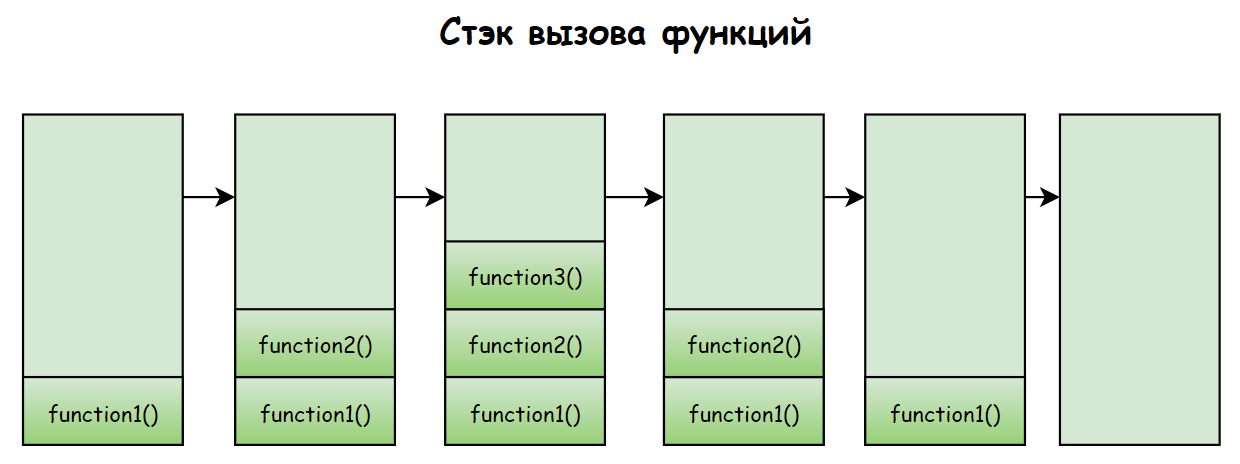

Когда Python при выполнении одной функции встречает шаг, на котором требуется выполнить другую функцию, он кладёт начальную функцию в стек, пока выполняет вторую. 

Если быть точнее, в стек кладётся не сама функция, а точка (адрес) возврата функции. Иначе говоря, место, в которое нужно вернуться после вызова новой функции.

Если и во второй функции окажется ссылка на другую функцию, вторая задача также будет отложена в стек. Так будет продолжаться до тех пор, пока наконец какая-нибудь функция не вернёт конкретное значение. Тогда интерпретатор начнёт свой обратный путь по стеку для выполнения отложенных, ожидающих решения задач. 

## 4.3. Разбираем рекурсивную функцию по частям

### Пример 1

Необходимо написать рекурсивную функцию factorial_recursion() для вычисления факториала числа. 

Примечение:
Факториал числа n вычисляется следующим образом:
$$ n! = n*(n-1)*(n-2)*(n-3)*...*2*1$$
$$ 0! = 1$$
$$ 1! = 1$$

Например:
$$ 3! = 3 * 2 * 1 = 6$$
$$ 5! = 5 * 4 * 3 * 2 * 1 = 120$$

Также можно заметить, что для факториала можно написать рекурсивное выражение:

$$ n! = n * (n-1)!$$

In [ ]:
def factorial_recursive(n):
    # Записываем условие остановки
    if n == 1 or n == 0:
        return 1
    # Вычисляем факториал по рекурсивной функции
    return n * factorial_recursive(n-1)

In [ ]:
num = 3
print(f"Факториал {num} это {factorial_recursive(num)}")

Факториал 3 это 6


Чтобы еще лучше понять, как это работает, разобьем на этапы процесс выполнения функции с параметром 3.

Для этого ниже представим каждый экземпляр с реальными числами. Это поможет «отследить», что происходит при вызове одной функции со значением 3 в качестве аргумента:

```python
# Первый вызов
factorial_recursive(3):
    if 3 == 1 or 3 == 0:
        return 1
    return 3*factorial_recursive(3-1)

# Второй вызов
factorial_recursive(2):
    if 2 == 1 or 2 == 0:
        return 1
    return 2*factorial_recursive(2-1)

# Третий вызов
factorial_recursive(1):
    if 1 == 1 or 1 == 0:
        return 1
    return 1*factorial_recursive(1-1)
```

Стек вызова:
```
/\ factorial_recursive(1) - последний вызов
|| factorial_recursive(2) - второй вызов
|| factorial_recursive(3) - первый вызов
```

Как только в стек добавляется вызов factorial_recursive(1), для которого ответ имеется, стек начинает «разворачиваться» в обратном порядке, выполняя все вычисления с реальными значениями. В процессе каждый из слоев выпадает в процессе.

* factorial_recursive(1) завершается, отправляет 1 в
* factorial_recursive(2) и выпадает из стека.
* factorial_recursive(2) завершается, отправляет 2*1 в
* factorial_recursive(3) и выпадает из стека. Наконец, инструкция else здесь завершается, возвращается 3 * 2 = 6, и из стека выпадает последний слой.

### Пример 2
Необходимо рекурсивную функцию multiply_lst(lst), которая перемножает элементы заданного списка lst между собой. Если в функцию передаётся пустой список, она должна возвращать 1.

In [ ]:
def multiply_lst(lst):
    print(lst)
    # Записываем условие остановки
    if len(lst) == 0:
        return 1
    # Во всех других случаях возвращаем
    # произведение первого элемента списка 
    # и результат умножения оставшихся
    return lst[0] * multiply_lst(lst[1:])

multiply_lst([10, 34, 22, 0.5, 0.01])

## 4.3. Глубина рекурсии

Число единовременно ожидающих выполнения вызовов рекурсивной функции в стеке и называется глубиной рекурсии. Проще говоря, глубина рекурсии — это длина стека вызова. 

Значение глубины рекурсии индивидуально и может зависеть от сложности самой функции, версии Python и других настроек. 

Чтобы узнать текущую глубину рекурсии можно воспользоваться следующим кодом:

In [ ]:
import sys
sys.getrecursionlimit()

1000

Если вам принципиально нужно изменить глубину рекурсии - воспользуйтесь функцией setrecursionlimit из модуля sys:

In [ ]:
import sys
# Увеличим глубину рекурсии
sys.setrecursionlimit(1000000000)
sys.getrecursionlimit()

1000000000

## 4.3. Рекурсивные задачи

Ранее мы рассматривали задачи, которые можно решить и без использования рекурсии. Однако, нередко встречаются задачи, решение которых через рекурсию будет лаконичнее, чем решение через циклы. 

Рассмотрим пример таких задач

### Задача 1
Необходимо написать функцию add_brackets(), которая принимает на вход строку, содержащую только английские буквы (большие и маленькие). Функция должна добавлять в строку открывающиеся и закрывающиеся скобки по следующему образцу: "example" -> "e(x(a(m)p)l)e".
 
До середины добавляются открывающие скобки, после середины – закрывающие. Если длина строки равна чётному числу, в скобках, расположенных в середине, должно быть два символа: "card" → "c(ar)d" (но не "c(a()r)d").

**Решение:**

In [ ]:
example = 'example'

def add_brackets(s):
    if len(s) == 1 or len(s) == 2:
        return s
    return s[0] + '(' + add_brackets(s[1:-1]) + ')' +s[-1]

add_brackets('example')

'e(x(a(m)p)l)e'

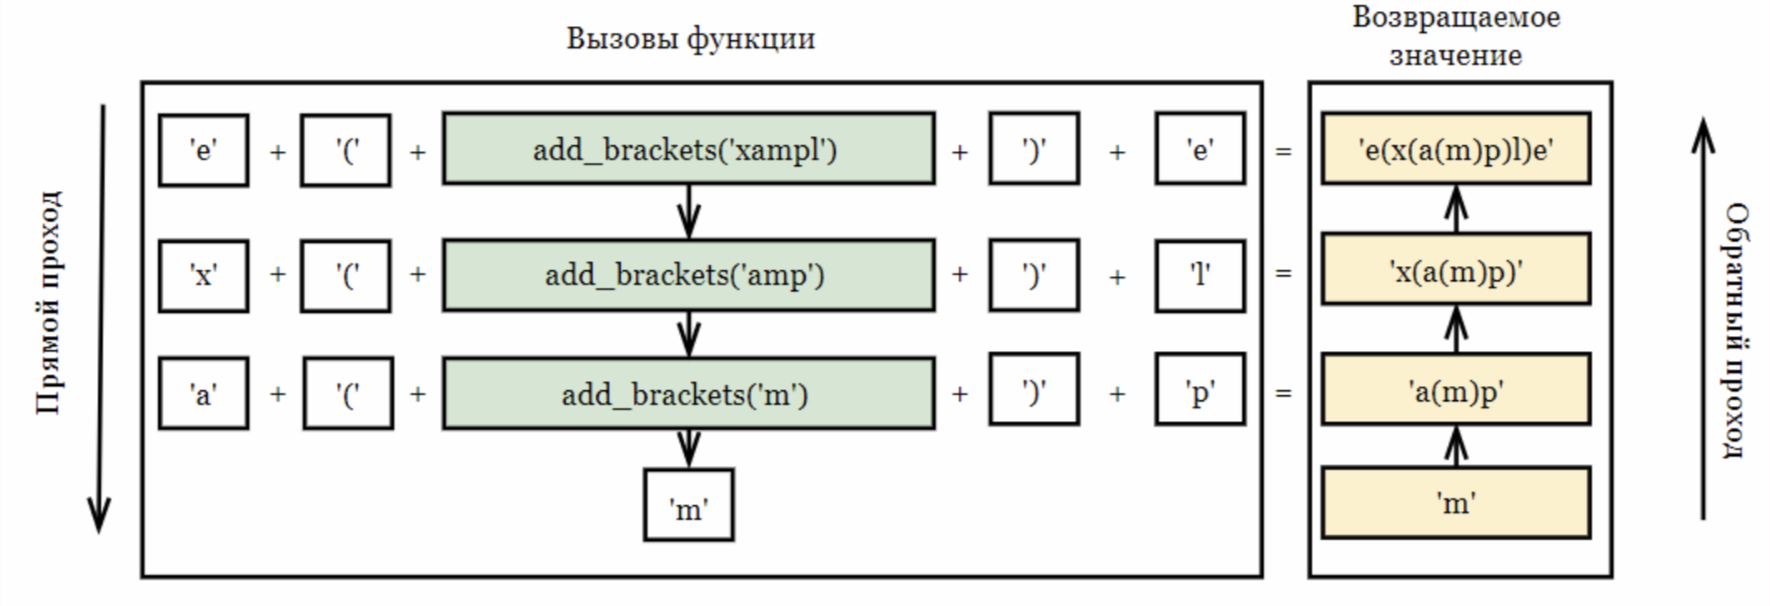

## Задача 2

Задан набор данных, представленный в виде словаря, содержащего в себе несколько вложенных структур данных. Некоторые из них (независимо от вложенности) будут содержать ключ VideoID.

In [ ]:
data = {
    "type": "video",
    "videoID": "vid001",
    "links": [
        {"type":"video", "videoID":"vid002", "links":[]},
        {   "type":"video", 
            "videoID":"vid003",
            "links": [
            {"type": "video", "videoID":"vid004"},
            {"type": "video", "videoID":"vid005"},
            ]
        },
        {"type":"video", "videoID":"vid006"},
        {   "type":"video",
            "videoID":"vid007",
            "links": [
            {"type":"video", "videoID":"vid008", "links": [
                {   "type":"video", 
                    "videoID":"vid009",
                    "links": [{"type":"video", "videoID":"vid010"}]
                }
            ]}
        ]},
    ]
}

Необходимо написать рекурсивную функцию, которая будет находить все значения с ключом «VideoID».

Пример вывода:

```python
output = [
  {'videoID': 'vid001'}, {'videoID': 'vid002'}, 
  {'videoID': 'vid003'}, {'videoID': 'vid004'}, 
  {'videoID': 'vid005'}, {'videoID': 'vid006'}, 
  {'videoID': 'vid007'}, {'videoID': 'vid008'}, 
  {'videoID': 'vid009'}, {'videoID': 'vid010'}
]
```

**Решение:**

In [ ]:
def find_video_id(data):
    output = []
    for key, value in data.items():
        if type(value) is list:
            for elem in value:
                output += find_video_id(elem)
        if key == 'videoID':
            output.append({key: data[key]})
    return output

find_video_id(data) 

[{'videoID': 'vid001'},
 {'videoID': 'vid002'},
 {'videoID': 'vid003'},
 {'videoID': 'vid004'},
 {'videoID': 'vid005'},
 {'videoID': 'vid006'},
 {'videoID': 'vid007'},
 {'videoID': 'vid008'},
 {'videoID': 'vid009'},
 {'videoID': 'vid010'}]

**Домашнее задание:**

Просмотреть и прорешать как можно больше задач на рекурсию вот [здесь](https://uproger.com/20-prakticheskih-zadanij-s-rekursiej-v-python-python-praktika/)

Решения задач оформить в виде Colab-ноутбука, записав задачи в формате:
* Задача №{}
* Условие задачи: {}
* Решение: {}

Сформированные Colab-ноутбуки высылать в телеграм или Slack

# <center> 5. Функции map() и filter()

## 5.1. Функция как объект

Важно понять одну вещь: функция, как и всё в Python (кроме ключевых слов, таких как if, def, while и т. д.), — это объект.

Важно! Когда мы обращаемся с функцией как с объектом, мы не пишем скобки после имени функции. Они нужны только тогда, когда мы вызываем функцию и передаем в неё аргументы.

Во-первых, точно так же, как и любой другой объект (числа, строки, списки и т. д.), мы можем положить функцию в переменную.

In [ ]:
# Создаём переменную p, которая будет ссылаться на функцию print
p = print
# Вызываем функцию print() от имени новой переменной
p('Hello world!')

Во-вторых, функцию можно передать в качестве аргумента для другой функции.

In [ ]:
# Функция, которая в качестве аргументов принимает 
# Другую функцию func и список x

def apply_func(func, x):
    # Функция вызывает переданную функцию, передавая ей в аргументы список x
    return func(x)

print(apply_func(max, [1, 10, 35, 20, -1]))
print(apply_func(min, [1, 10, 35, 20, -1]))
print(apply_func(len, [1, 10, 35, 20, -1]))

В-третьих, у функции точно так же, как и любого другого объекта, есть свой тип данных — тип function. Давайте убедимся в этом.

In [ ]:
print(type(apply_func))

## 5.2. Функция map()

Часто возникает вопрос: как применить одну и ту же функцию к каждому элементу итерируемого объекта?

Итак, у нас есть итерируемый объект — пусть это будет список слов — и нам с каждым его элементом необходимо совершить преобразование, например вычислить длину каждого слова в нём, привести все слова к нижнему регистру, удалить знаки препинания и т. д.

Решение такого типа задач вам уже известно — проход по элементам в цикле и применение определённых операций в цикле. Но существует более простой, лаконичный и, главное, быстрый способ, который мы и изучим в этом разделе.



In [ ]:
words_list = ["We're", 'in', 'a', 'small', 'village', 'near', 'Chicago', 'My', "cousin's", 'getting', 'married.']

In [ ]:
lengths_list = []
# Создаём цикл по элементам списка names
for word in words_list:
    # Вычисляем длину текущего слова
    length = len(word)
    # Добавляем вычисленную длину слова в список
    lengths_list.append(length)
# Посмотрим, что получилось
print(lengths_list)

[5, 2, 1, 5, 7, 4, 7, 2, 8, 7, 8]


Оказывается, в Python можно применять функции к элементам списка и без циклов. Для этого используется встроенная функция map(). Использование map() даёт сразу несколько преимуществ:

* простота кода — код становится короче, вплоть до одной строки, и выглядит более лаконичным;
* скорость — возможности, которые мы рассмотрим, в большинстве случаев работают быстрее, чем использование функции в цикле.

Для этого воспользуемся специальной встроенной в Python функцией map(). Она позволяет преобразовать каждый элемент итерируемого объекта по заданной функции.

Аргументы функции map() следующие:

* первый — функция, которую необходимо применить к каждому элементу; 
* второй — итерируемый объект (например, список).

In [ ]:
# Для этого передаём функцию len и список words_list в функцию map 
lengths_map = map(len, words_list)
# Смотрим, что получилось
print(lengths_map)

In [ ]:
# Для этого передаём функцию len и список words_list в функцию map
# Результат преобразуем в список
lengths_list = list(map(len, words_list))
# Посмотрим, что получилось
print(lengths_list)

[5, 2, 1, 5, 7, 4, 7, 2, 8, 7, 8]


Еще пример:

У нас есть данные о расходах компании за 2022 год, разделённые на кварталы (от первого до четвёртого). Данные представлены в виде списка, состоящего из кортежей, элементами которых являются три числа — расходы в первый, второй и третий месяцы квартала. Необходимо рассчитать максимальные расходы в каждом из кварталов.

In [ ]:
expenses = [(101, 203, 167), (214, 351, 752), (255, 2537), (852, 362, 366)]

expenses_max = list(map(max, expenses))
print(expenses_max)

[203, 752, 2537, 852]


map() может работать и с пользовательскими функциями

Представим, что у нас есть список зарплат сотрудников salaries.
Необходимо посчитать, какой налог необходимо удержать с каждой зарплаты. Допустим: у нас используется прогрессивная система налогообложения, то есть чем выше зарплата, тем выше налог. Налог на доход меньше 1000 составляет 5 %, от 1000 до 2000 — 10 %, а если доход превышает 2000, то налог составляет 15 %.

In [ ]:
def calculate_tax(salary):
    if salary < 1000: # Если зарплата < 1000
        # Налог — 5 % от зарплаты
        return salary * 0.05
    elif salary < 2000: # Если зарплата < 2000
        # Налог — 10 % от зарплаты
        return salary * 0.1
    else:
        # Налог — 15 % от зарплаты
        return salary * 0.15
print(calculate_tax(1500))

150.0


In [ ]:
salaries = [1500, 2200, 3500, 1200]

taxes = list(map(calculate_tax, salaries))

print(taxes)

[150.0, 330.0, 525.0, 120.0]


Решая задачу обработки естественного языка нам необходимо с каждым предложением произвести следующие действия:
* Привести строку к нижнему регистру
* Убрать знаки препинания
* Разделить строку по пробелам

Необходимо произвести эти действия со всеми элементами списка

In [ ]:
# Функция для преобразования одного элемента списк
def preprocessing_text(text, stop_symbols='"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~!'):
    # Приводим строку к нижнему регистру
    text = text.lower()
    for sym in stop_symbols:
        # Если стоп-символ есть в строке answer
        if sym in text:
            # Заменяем стоп-символы в строке на пустые строки
            text = text.replace(sym, '')
    # Разделяем строку на слова по пробелу
    words = text.split(' ')
    # Возвращаем кортеж из названия произведения и текста
    return words

texts = [
    'А знаешь ли... что низкие потолки и тесные комнаты душу и ум теснят.',
    'И нет величия там, где нет простоты, добра и правды.',
    'Если искать совершенства, то никогда не будешь доволен.',
    'Правил у нас много, а правды нет.', 
    'Колесо времени', 'Ничто так на соединяет людей, как улыбка.'
]

preprocessed_texts = list(map(preprocessing_text, texts))
print(preprocessed_texts)

[['а', 'знаешь', 'ли', 'что', 'низкие', 'потолки', 'и', 'тесные', 'комнаты', 'душу', 'и', 'ум', 'теснят'], ['и', 'нет', 'величия', 'там', 'где', 'нет', 'простоты', 'добра', 'и', 'правды'], ['если', 'искать', 'совершенства', 'то', 'никогда', 'не', 'будешь', 'доволен'], ['правил', 'у', 'нас', 'много', 'а', 'правды', 'нет'], ['колесо', 'времени'], ['ничто', 'так', 'на', 'соединяет', 'людей', 'как', 'улыбка']]


map() работает и с lambda-функциями

In [ ]:
number_list = [11, 12, 13, 14, 15, 16]
# Создаём lambda-функцию, которая возводит число в куб, и применяем её к списку
square_number_list = list(map(lambda x: x**3, number_list))
# Выводим результирующий список
print(square_number_list)


In [ ]:
str_list = ['шалаш', 'казак', 'палиндром', 'рвал дед лавр']
# Создаем lambda-функцию, которая переворачивает одну строку, и применяем её к списку
reverse_str_list = list(map(lambda x: x[::-1], str_list))
# Выводим результирующий список
print(reverse_str_list)


## 5.3. Функция filter()

Часто требуется отобрать из последовательности элементы, удовлетворяющие определённому условию. 

Например, из списка пользовательских оценок видеоигры необходимо выделить только те, что выше 70 баллов. Такая операция называется фильтрация — мы отсекаем данные, которые не проходят фильтр. 


Пример: отфильтровать строки, длина которых четная

In [ ]:
words_list = ["We're", 'in', 'a', 'small', 'village', 'near', 'Chicago', 'My', "cousin's", 'getting', 'married.']

**Решение через цикл:**

In [ ]:
# Создаём пустой список, куда будем добавлять результаты
even_list = []
# Создаём цикл по элементам списка
for word in words_list:
    # Проверяем условие, что длина текущего слова чётная
    if len(word) % 2 == 0: # Если условие выполняется
        # Добавляем слово в новый список
        even_list.append(word)
print(even_list)

Ту же задачу можно решить с помощью специальной, встроенной в Python функции `filter()`. Она позволит отфильтровать переданный ей итерируемый объект и оставить в нём только те элементы, которые удовлетворяют условию.


Её использование аналогично применению функции map(). Аргументы функции `filter() следующие`:
* первый — функция, которая должна возвращать True, если условие выполнено, иначе возвращается False;
* второй — итерируемый объект, с которым производится действие. 

Можно записать это в виде шаблона кода:
`filter(<имя_функции>, <итерируемый_объект>)`


In [ ]:

# Объявляем функцию для проверки чётности длины строки
def is_even(x):
    return len(x) % 2 == 0

# Применяем функцию is_even() к каждому элементу списка
# Для этого передаём функцию is_even() и список words_list в функцию filter
even = filter(is_even, words_list)
# Смотрим, что получилось 
print(even)


Функция filter() возвращает объект типа filter, который, как и объект map(), является итератором. Поэтому результат работы функции filter() стоит обернуть в список с помощью функции list().

In [ ]:
# Результат оборачиваем в список
even_list = list(filter(is_even, words_list))
# Смотрим, что получилось 
print(even_list)


['in', 'near', 'My', "cousin's", 'married.']


Заметим, что функция is_even() тоже устроена довольно просто. Мы могли создать её и с помощью lambda-выражения при вызове filter():

In [ ]:
words_list = ["We're", 'in', 'a', 'small', 'village', 'near', 'Chicago', 'My', "cousin's", 'getting', 'married.']

# Применяем lambda-функцию к каждому элементу списка
even_list = filter(lambda x: len(x) % 2 == 0, words_list)
# Смотрим, что получилось
print(list(even_list))



['in', 'near', 'My', "cousin's", 'married.']


Школа онлайн-образования разрабатывает курс «Full-Stack разработчик» и собирает данные по каждому модулю курса.


В списке кортежей data представлена выгрузка данных из базы данных об оценках бонусных (дополнительных) модулей курса. 




In [ ]:

data = [
    ("FPW-2.0_D", "Бонус: Тренажер по HTML", 10, 100, 10),
    ("FPW-2.0", "Бонус: Тренажер по JavaScript", 9.2, 70, 180),
    ("FPW-2.0_D", "Бонус: Тренажер по React", 8.5, 66.67, 68),
    ("FPW-2.0", "Бонусный: IT в современном мире", 8.64, 83.74, 856),
    ("FPW-2.0", "Бонусный: Введение", 8.73, 56.24, 745),
    ("FPW-2.0", "Бонус: D1. Знакомство с Django (NEW)", 9.76, 95.24, 21),
    ("FPW-2.0_D", "Бонус: D2. Модели (NEW)", 9.44, 77.78, 18)
]



Данные по каждому модулю представлены в виде кортежей, состоящих из пяти элементов:
* Кодовое название курса.
* Название курса.
* Средняя оценка модуля.
* NESSA — это внутренняя метрика компании, показывающая качество модуля (измеряется от 0 до 100).
* Количество оценок.

Необходимо выбрать из представленных данных только те модули, которые относятся к курсу FPW-2.0, их NESSA > 70 и количество оценок > 50.

In [ ]:
def filter_module(module):
    # Распаковываем кортеж на 5 переменных
    code, name, avg_votes, nessa, count = module
    # Создаем условия 
    cond_1 = code == "FPW-2.0"
    cond_2 = nessa >= 70
    cond_3 = count > 50
    # Условия должны выполняться одновременно
    return cond_1 and cond_2 and cond_3

print(filter_module(module=("FPW-2.0_D", "Бонус: Тренажер по HTML", 10, 100, 10)))
print(filter_module(module=("FPW-2.0", "Бонус: Тренажер по JavaScript", 9.2, 70, 180)))

False
True


In [ ]:
# Применяем функцию filter_module() для фильтрации списка кортежей
filtered_data = list(filter(filter_module, data))
print(filtered_data)


[('FPW-2.0', 'Бонус: Тренажер по JavaScript', 9.2, 70, 180), ('FPW-2.0', 'Бонусный: IT в современном мире', 8.64, 83.74, 856)]


Заметим, что при желании функцию filter_module() можно переписать в виде однострочной lambda-функции:


In [ ]:
# Создаем lambda-функцию, которая возвращает True, если модуль удовлетворяет условиям
lambda_filter_module = lambda x: (x[0] == "FPW-2.0") and (x[3] >= 70) and (x[4] > 50)
# Применяем эту функцию к каждому элементу списка (к каждому кортежу)
filtered_data = list(filter(lambda_filter_module, data))
# Посмотрим, что получилось
print(filtered_data)


[('FPW-2.0', 'Бонус: Тренажер по JavaScript', 9.2, 70, 180), ('FPW-2.0', 'Бонусный: IT в современном мире', 8.64, 83.74, 856)]


## 5.3. Конвейеры из map() и filter()

Перед нами снова выгрузка данных о параметрах человеческого тела (только теперь она немного больше), представленная в виде списка кортежей. Один кортеж состоит из трёх элементов (признаков): 
имени человека; 
его роста (в метрах);
веса (в килограммах).
```
# Выгрузка данных о параметрах человеческого тела
data = [
    ('Amanda', 1.61, 51),
    ('Patricia', 1.65, 61), 
    ('Marcos', 1.91, 101),
    ('Andrey', 1.79, 61),
    ('Nikos', 1.57, 78),
    ('Felicia', 1.63, 56),
    ('Lubov', 1.53, 34)
]
```

В таблице ниже представлены медицинские характеристики соотношения массы и роста, составленные на основе значения индекса массы тела.

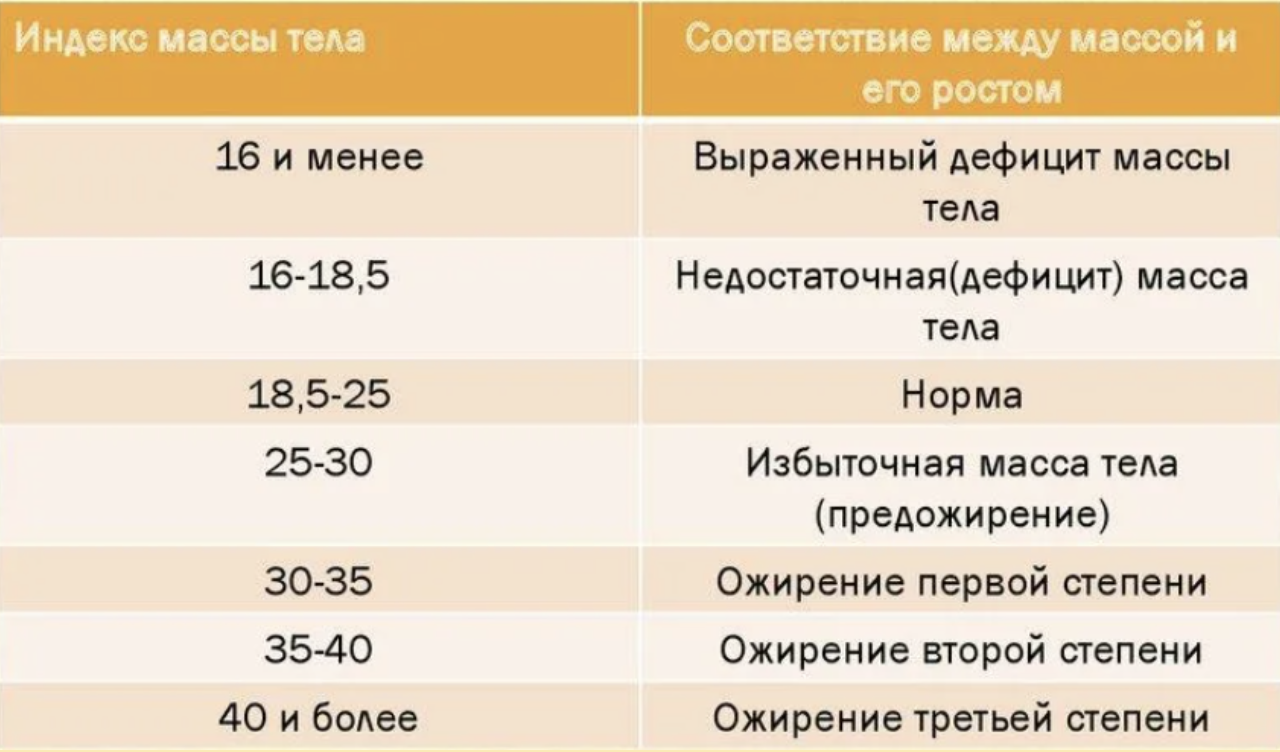

Нам необходимо выбрать из данных только тех пациентов, у кого соотношение массы и роста находится в пределах нормы. 

Результатом работы нашей программы должен стать список кортежей, удовлетворяющих условию. 


In [ ]:
data = [
    ('Amanda', 1.61, 51),
    ('Patricia', 1.65, 61), 
    ('Marcos', 1.91, 101),
    ('Andrey', 1.79, 61),
    ('Nikos', 1.57, 78),
    ('Felicia', 1.63, 56),
    ('Lubov', 1.53, 34)
]

In [ ]:
# Создаём lambda-функцию, которая считает BMI, и применяем её к каждому элементу списка
map_func = lambda x: (x[0], x[1], x[2], x[2]/(x[1]**2))
updated_data = map(map_func, data)

# Создаём lambda-функцию, которая возвращает True, если 18.5 <= BMI <= 25
filter_func = lambda x: 18.5 <= x[3] <= 25
filtered_data = filter(filter_func, updated_data)
# Переводим объект filter в list и печатаем его
print(list(filtered_data))

[('Amanda', 1.61, 51, 19.675166853130666), ('Patricia', 1.65, 61, 22.4058769513315), ('Andrey', 1.79, 61, 19.038107424861895), ('Felicia', 1.63, 56, 21.077195227520797)]


## Дополнительные материалы к вебинару:
* [Задачи на рекурсию](https://uproger.com/20-prakticheskih-zadanij-s-rekursiej-v-python-python-praktika/)
* [Замыкания и декораторы](https://russianblogs.com/article/87301643996/)
* [Итераторы](https://habr.com/ru/post/488112/)
* [Генераторы](https://pythonist.ru/generatory-v-python/)

## [Ссылка на обратную связь по вебинару](https://skillfactoryschool.typeform.com/to/E9YAIWSL#course=xxxxx&webinar=xxxxx&link=xxxxx)